In [ ]:
# Install and imoport necessary packages

In [2]:
pip install tensorflow --user


  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached grpcio-1.39.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
pip install biosppy

  Using cached shortuuid-1.0.1-py3-none-any.whl (7.5 kB)
  Created wheel for biosppy: filename=biosppy-0.7.3-py2.py3-none-any.whl size=95409 sha256=0286ecc042a2ccceaa48af35409176d3177e8a88b526d5041c0a0fbdcd6815e9
  Stored in directory: c:\users\liuji\appdata\local\pip\cache\wheels\9f\e5\6b\95cda9da98a09d4d42ec8f4bfa6bcf9f768dd99d83c4e8d403
Successfully built biosppy
Note: you may need to restart the kernel to use updated packages.


  0%|                                                                                         | 0/8528 [00:00<?, ?it/s]C:\Users\Liuji\Anaconda3\lib\site-packages\biosppy\plotting.py:1145: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  gs.tight_layout(fig)
  0%|                                                                                         | 0/8528 [00:00<?, ?it/s]


TypeError: argument of type 'bool' is not iterable

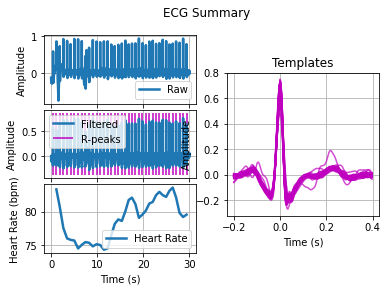

In [1]:
%run Preprocess.py

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Activation
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, TensorBoard
import Eval_model as eva

In [6]:
def get_1DCNN(x_train, y_train, x_test, y_test, epochs = 50):
    
    model = Sequential()
    
    model.add(Conv1D(16, 3, activation = 'relu', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(32, 3, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(64, 3, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    
    model.add(Dense(4, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    callback = [EarlyStopping(monitor = 'val_loss', patience = 20),
                ModelCheckpoint(filepath ='1DCNN_best_model.h5', monitor = 'val_loss', save_best_only = True)]
    
   #callback = [TensorBoard]
    
    history = model.fit(x_train, y_train, 
                        batch_size = 32, 
                        epochs = epochs, 
                        callbacks = callback, 
                        validation_data = (x_test, y_test))
    
    return history, model

def InputPreprocess(x_train, y_train, x_test, y_test):
    #reshape x
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] , 1)) # numpy.reshape 怎么理解？
    x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    y_true = y_test
    #reshape y 
    y_test = to_categorical(y_test, 4, dtype = 'int8')
    y_train = to_categorical(y_train, 4, dtype = 'int8')
    
    return x_train, y_train, x_test, y_test, y_true

In [8]:
import pickle
train = pickle.load(open('train_med_amp.pk1', 'rb'))
test = pickle.load(open('test_med_amp.pk1', 'rb'))
x_train = []
y_train = []

for lb, sg in train:
    x_train.append(sg)
    y_train.append(lb)

x_train = np.array(x_train).astype('float32')
y_train = np.array(y_train).astype('int8')

x_test = []
y_test = []
for lb, sg in test:
    x_test.append(sg)
    y_test.append(lb)

x_test = np.array(x_test).astype('float32')
y_test = np.array(y_test).astype('int8')

In [9]:
x_train, y_train, x_test, y_test, y_true = InputPreprocess(x_train, y_train, x_test, y_test)

In [10]:
history, model = get_1DCNN(x_train, y_train, x_test, y_test)

Epoch 1/50
267/267 [==============================] - 3s 8ms/step - loss: 1.0071 - accuracy: 0.5902 - val_loss: 1.3175 - val_accuracy: 0.4133
Epoch 2/50
267/267 [==============================] - 2s 8ms/step - loss: 0.8850 - accuracy: 0.6193 - val_loss: 1.0039 - val_accuracy: 0.5733
Epoch 3/50
267/267 [==============================] - 2s 8ms/step - loss: 0.8477 - accuracy: 0.6339 - val_loss: 0.8966 - val_accuracy: 0.6167
Epoch 4/50
267/267 [==============================] - 2s 8ms/step - loss: 0.8395 - accuracy: 0.6367 - val_loss: 0.8753 - val_accuracy: 0.6433
Epoch 5/50
267/267 [==============================] - 2s 8ms/step - loss: 0.8126 - accuracy: 0.6519 - val_loss: 0.9024 - val_accuracy: 0.6333
Epoch 6/50
267/267 [==============================] - 2s 8ms/step - loss: 0.8002 - accuracy: 0.6526 - val_loss: 0.9280 - val_accuracy: 0.6333
Epoch 7/50
267/267 [==============================] - 2s 8ms/step - loss: 0.7828 - accuracy: 0.6628 - val_loss: 0.9335 - val_accuracy: 0.6667
Epoch 

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 178, 16)           64        
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 16)           64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 89, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 87, 32)            1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 87, 32)            128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 43, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 64)            6

Accuracy = 86.67%
F1 score = 84.88
Sensitivity: Normal = 0.960, AFib = 0.760, Others = 0.686, Noise = 1.000
Specificity: Normal = 0.833, AFib = 0.988, Others = 0.991, Noise = 0.963
Positive predictive value: Normal = 0.852, AFib = 0.927, Others = 0.960, Noise = 0.750
Negative predictive value: Normal = 0.954, AFib = 0.954, Others = 0.912, Noise = 1.000
Confusion matrix, without normalization


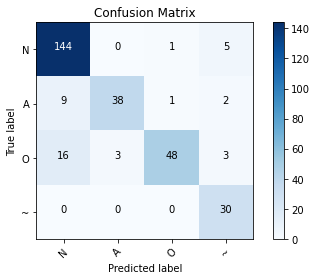

Normalized confusion matrix


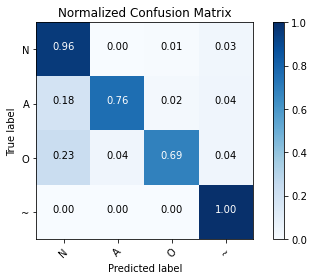

In [12]:
eva.get_summary(x_test, y_true, model)

Accuracy: 86.67%


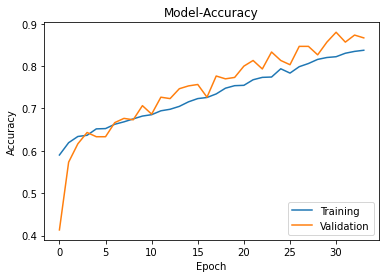

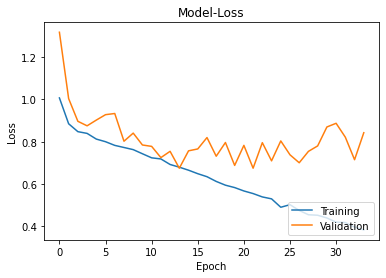

In [13]:
eva.Plot_Acc_and_Loss(history, x_test, y_test, model)